# Zadania

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

sns.set_theme(style="whitegrid")

### Zadanie 2.1 (1 punkt)

Wybierz dwie dowolne kolumny (z wyjątkiem pierwszej) z pliku *data2.csv*. Przedstaw zależność między tymi danymi na wykresie punktowym (wartości z jednej kolumny powinny znaleźć się na jednej osi, a wartości z drugiej kolumny – na drugiej osi).

### Rozwiązanie 2.1

In [222]:
df = pd.read_csv("data2.csv", header=None, index_col=0).reset_index(drop=True)
df.columns = [f"header{i}"  for i, _ in enumerate(df.columns)]

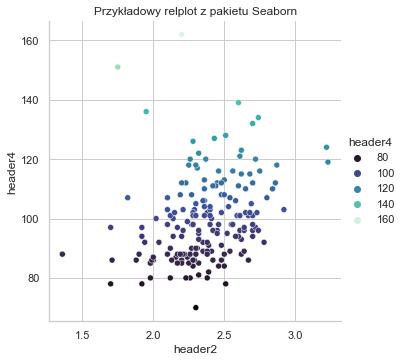

In [223]:
ax = sns.relplot(x="header2", y="header4", data=df, hue="header4", palette="mako")
ax.set(title="Przykładowy relplot z pakietu Seaborn")

### Zadanie 2.2 (3 punkty)

#### Część A (2 punkty)
Wygeneruj wykres funkcji $y = f(x) = (a - 4) \, x^2 + (b - 5) \, x + (c - 6)$, gdzie $a, b, c$ to trzy ostatnie cyfry Twojego numeru indeksu. Pamiętaj o opisaniu osi wykresu ($x$ oraz $y$).

#### Część B (1 punkt)
Na wykresie z zadania 2.2 przedstaw dodatkowo wykres funkcji $y = g(x) = \frac{e^x}{e^x + 1}$. Linie przestawiające funkcje $y = f(x)$ i $y = g(x)$ powinny znaleźć się na tym samym wykresie, ale powinny różnić się kolorami.

### Rozwiązanie 2.2 A

<AxesSubplot:title={'center':'Wykres $f(x) = (a-4)x^2 + (b-5)x + (c+6)$'}, xlabel='x', ylabel='$f(x)$'>

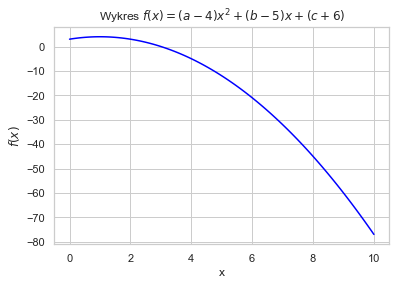

In [224]:
a, b, c = 3, 7, 9
x = np.linspace(0, 10, 100)
y = ((a - 4) * (x**2)) + (b - 5) * x + (c - 6) 
ax = sns.lineplot(x=x, y=y, color="blue")
ax.set(title=r"Wykres $f(x) = (a-4)x^2 + (b-5)x + (c+6)$", xlabel="x", ylabel="$f(x)$")
ax

### Rozwiązanie 2.2 B

In [225]:
g = (np.e**x) / ((np.e**x) + 1)
df = pd.DataFrame({'x': x, 'y': y, 'g': g}).melt(id_vars="x", value_vars=['y', 'g'])
df

,x,variable,value
0,0.00000,y,3.000000
1,0.10101,y,3.191817
2,0.20202,y,3.363228
3,0.30303,y,3.514233
4,0.40404,y,3.644832
...,...,...,...
195,9.59596,g,0.999932
196,9.69697,g,0.999939
197,9.79798,g,0.999944
198,9.89899,g,0.999950


[Text(0.5, 1.0, 'Wykres $f(x) = (a-4)x^2 + (b-5)x + (c+6)$ \n $g(x) = \\dfrac{e^x}{e^x + 1}$\n')]

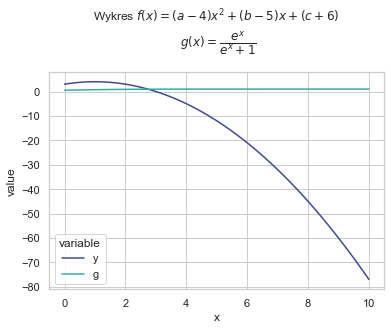

In [226]:
ax = sns.lineplot(data=df, x='x', y='value', hue='variable', palette='mako')
ax.set(title="Wykres $y = f(x) = (a-4)x^2 + (b-5)x + (c+6)$ \n $g = g(x) = \dfrac{e^x}{e^x + 1}$\n")

### Zadanie 2.3 (1 punkt)

Stwórz trójwymiarowy (powierzchniowy) wykres funkcji $f(x,y) = -(x^2 + y^3)$.

Wykres powinien przedstawiać powierzchnię $z = -(x^2 + y^3)$.

### Rozwiązanie 2.3

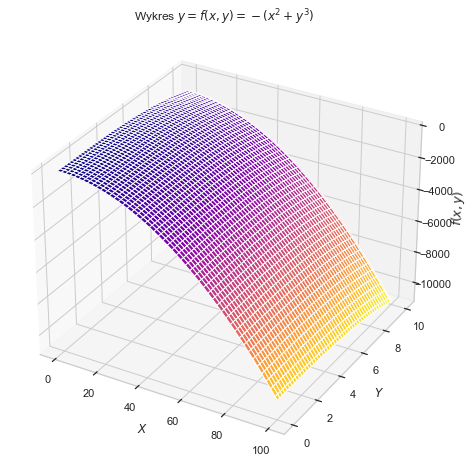

In [227]:
from matplotlib import cm

x = np.linspace(0, 100, 100)
y = np.linspace(0, 10, 100)
x, y = np.meshgrid(x, y)
z = -(x**2 + y**3)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set(title="Wykres $y = f(x, y) = -(x^2 + y^3)$", xlabel="$X$", ylabel="$Y$", zlabel="$f(x, y)$")
ax.plot_surface(x, y, z, cmap=cm.plasma_r)